In [1]:
%load_ext autoreload
%autoreload 2
%cd ..
%matplotlib inline

/Users/vbd402/Documents/Projects/mixedbridge


In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from src.solvers.wiener import WienerProcess
from src.solvers.euler import Euler
from src.stochastic_processes.cell_diffusion_process import CellDiffusionProcess, CellDiffusionProcessAux
from src.stochastic_processes.guided_bridge_process import GuidedBridgeProcess

In [30]:
dim = 2
alpha = 1. / 16.
sigma = .1
T = 4.0
dt = 1./500
dtype = jnp.float32
rng_key = jax.random.PRNGKey(42)
x0 = jnp.array([0.1, -0.1], dtype=dtype)

In [31]:
wiener_process = WienerProcess(dim, dtype, rng_key)
sde = CellDiffusionProcess(alpha, sigma, T=T, dt=dt)
solver = Euler(sde)

tt = lambda t: t * (2 - t / T)
tts = tt(sde.ts)
dWs = wiener_process.sample_path(tts)
path = solver.solve(x0, dWs=dWs)

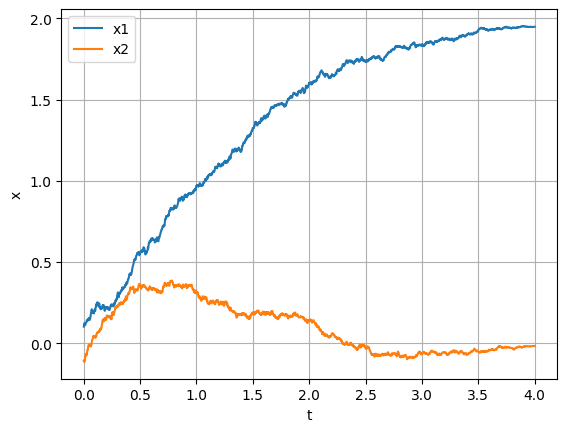

In [32]:
plt.plot(sde.ts[1:], path[:, 0], label='x1')
plt.plot(sde.ts[1:], path[:, 1], label='x2')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()

In [33]:
aux_sde = CellDiffusionProcessAux(alpha, sigma, T=4.0, dt=1./500.)
L0 = jnp.eye(dim, dtype=dtype)
x0 = jnp.array([0.1, -0.1], dtype=dtype)
xT = jnp.array([2.0, -0.1], dtype=dtype)
Sigma0 = jnp.eye(dim, dtype=dtype) * 1e-10
guided_sde = GuidedBridgeProcess(sde, aux_sde, L0, Sigma0, start=x0, target=xT)
solver = Euler(guided_sde)
path = solver.solve(x0, dWs=dWs)

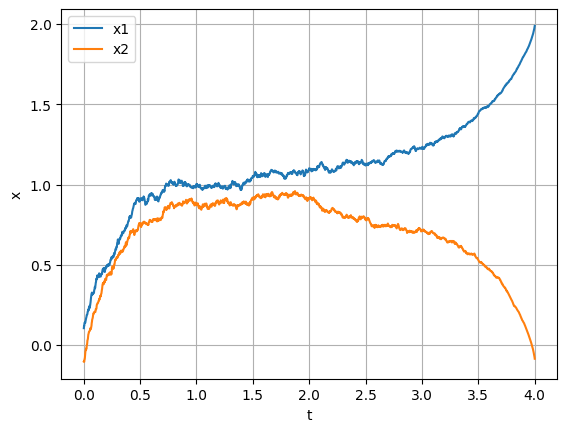

In [34]:
plt.plot(sde.ts[1:], path[:, 0], label='x1')
plt.plot(sde.ts[1:], path[:, 1], label='x2')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()